In [9]:
import geopy
import pandas as pd

In [140]:
# put for later to extract location information 
#re.findall("[0-9].*", "3650 Pöggstall")

In [18]:
df = pd.read_csv('data.csv', sep=';', usecols=range(1,12))

In [25]:
df.head(10)

,Liga,Round,Matchday Date,Hometeam,Hometeam Standing,Hometeam points,Awayteam,Awayteam Standing,Awayteam points,Matchday Time,Fans watching
0,2 Klasse Yspertal/AV,1. Runde,15.08.2021,Emmersdorf,7,0,Leiben,7,0,17:30,120
1,2 Klasse Yspertal/AV,1. Runde,15.08.2021,Nöchling,7,0,Alpenvorland USG,7,0,17:30,126
2,2 Klasse Yspertal/AV,1. Runde,15.08.2021,Pöggstall,7,0,Erlauf,7,0,17:30,0
3,2 Klasse Yspertal/AV,1. Runde,14.08.2021,Yspertal,7,0,Maria Taferl,7,0,17:30,100
4,2 Klasse Yspertal/AV,1. Runde,13.08.2021,Jauerling,7,0,Kleinpöchlarn,7,0,20:00,42
5,2 Klasse Yspertal/AV,1. Runde,13.08.2021,Weiten,7,0,Viehdorf,7,0,20:00,74
6,2 Klasse Yspertal/AV,1. Runde,13.08.2021,Münichreith,7,0,Neumarkt,7,0,18:00,65
7,2 Klasse Yspertal/AV,2. Runde,22.08.2021,Neumarkt,7,1,Weiten,11,0,17:00,140
8,2 Klasse Yspertal/AV,2. Runde,22.08.2021,Viehdorf,6,3,Nöchling,14,0,17:00,50
9,2 Klasse Yspertal/AV,2. Runde,21.08.2021,Erlauf,5,3,Yspertal,4,3,17:00,150


In [67]:
df.Liga.unique()

array(['2 Klasse Yspertal/AV', '2 Klasse Ybbstal/AV', '1 Klasse Nord',
       '1 Klasse Ost', '1 Klasse Waldviertel', '1 Klasse Süd',
       '1 Klasse West', '1 Klasse Nordwest', 'Gebietsliga Nord/Nordwest',
       'Gebietsliga Nordwest/Waldviertel', 'Gebietsliga Süd/Südost',
       'Gebietsliga West', '2 Landesliga Ost', '2 Landesliga West',
       '1 Landesliga'], dtype=object)

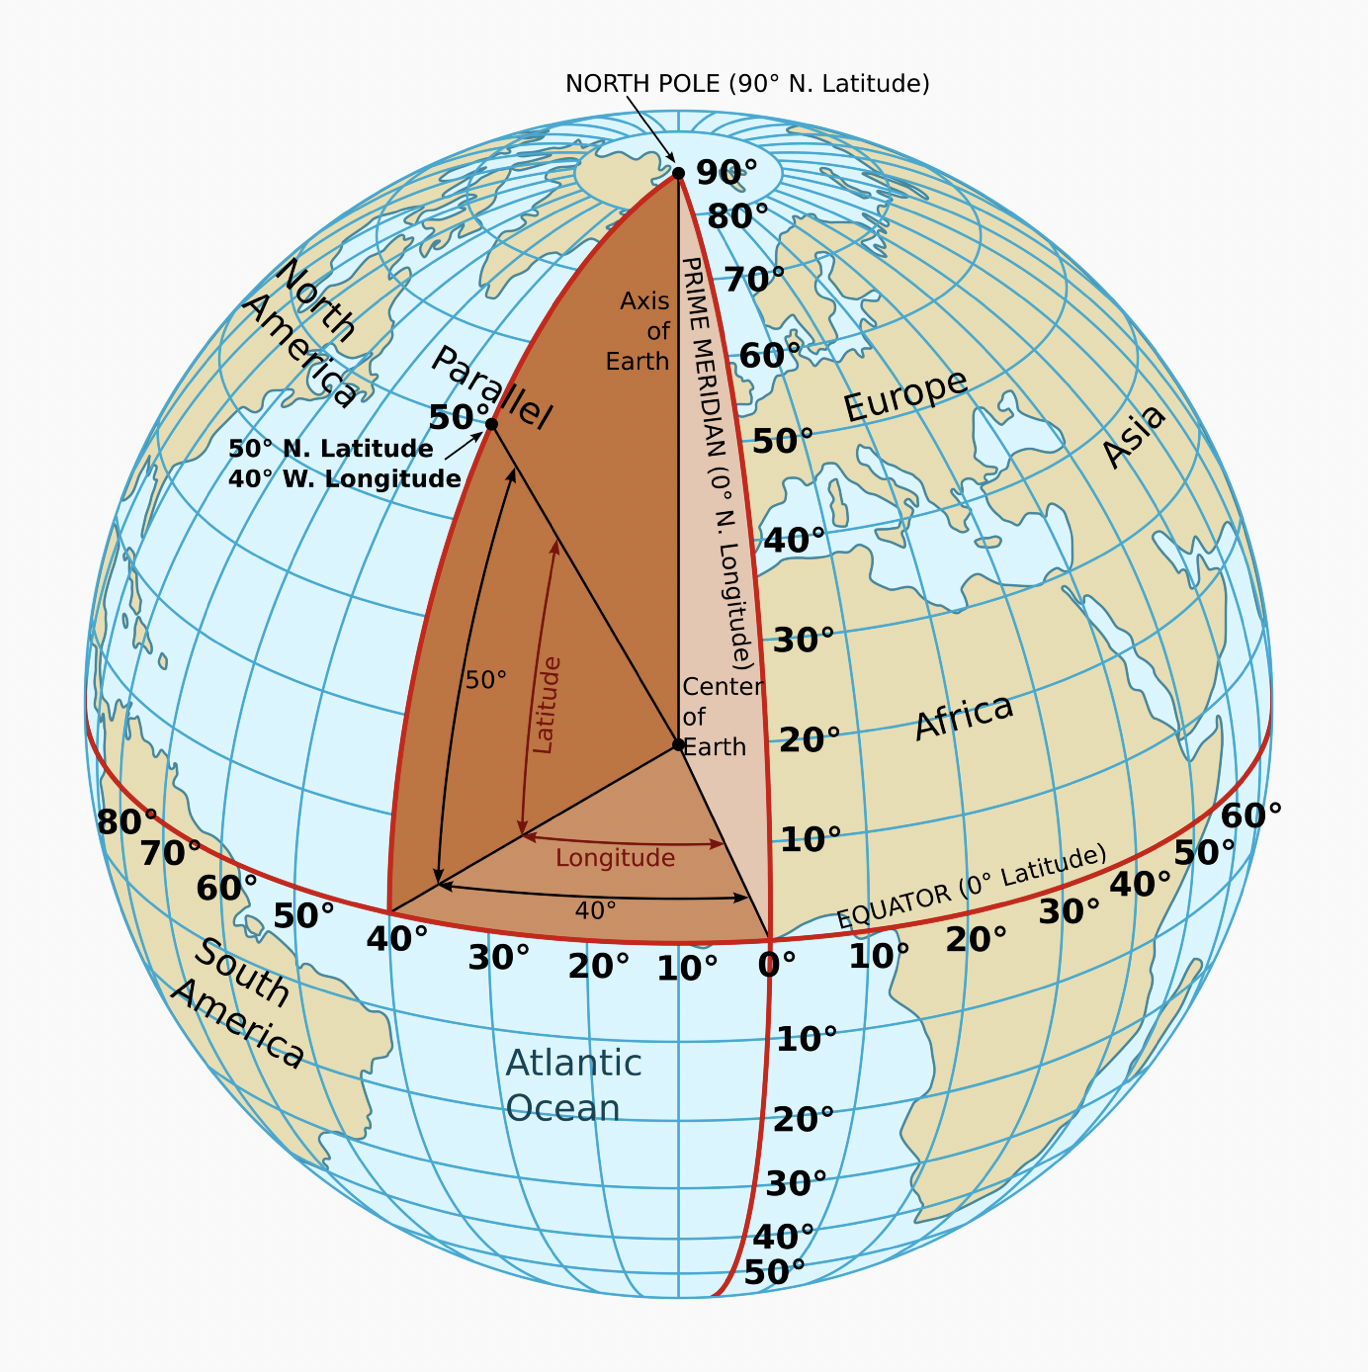

# Get location data

### Check out [GEOPY's Github](https://github.com/geopy/geopy)

#### geopy requests return the form (LATTITUDE, LONGITUDE) 
#### positive values indicate an orientation into North for lattitude and east for longitude

In [143]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_application")
location = geolocator.geocode("3342 Opponitz, Niederösterreich")
print(location[0],"\n", location[1])

Opponitz, Bezirk Amstetten, Niederösterreich, 3342, Österreich 
 (47.877461474456524, 14.825728672325491)


In [90]:
len(df.Hometeam.unique()), df.Hometeam.unique()[:10]

(217,
 array(['Emmersdorf', 'Nöchling', 'Pöggstall', 'Yspertal', 'Jauerling',
        'Weiten', 'Münichreith', 'Neumarkt', 'Viehdorf', 'Erlauf'],
       dtype=object))

In [124]:
df.Hometeam.loc[df.Liga.str.contains('Gebiets')][:20]

1381    FC Marchfeld / Mannsdorf-Große. KM II
1382                                  Hohenau
1383                         Sieghartskirchen
1384                               Ernstbrunn
1385                    Miet Tech Wullersdorf
1386                                  Neudorf
1387                        FC Klosterneuburg
1388                             Langenlebarn
1389                                  Prottes
1390                                  Gablitz
1391                    Miet Tech Wullersdorf
1392                        FC Klosterneuburg
1393                                Laa/Thaya
1394                                Ladendorf
1395                               Ernstbrunn
1396                                   Lassee
1397                                  Hohenau
1398    FC Marchfeld / Mannsdorf-Große. KM II
1399                                    Tulln
1400                                  Neudorf
Name: Hometeam, dtype: object

In [129]:
for Ort in df.Hometeam.loc[df.Liga.str.contains('Gebietsliga')].unique():
    Ort = Ort.split("-")[0].replace('SC', '').replace('KM','').replace('FC','').replace('II','').replace('SKU','').replace('SG','').replace('Amateure','').replace('1.','').replace('Juniors','').strip()
    print(Ort)
    location = geolocator.geocode(Ort + ' Niederösterreich, Österreich')
    if location is None:
        location = geolocator.geocode(Ort + ' Oberösterreich, Österreich')
        
    print(Ort,f"{location[0] + ', ' + str(location[1]) if location is not None else 'keine Angabe'}",'\n')

Marchfeld / Mannsdorf
Marchfeld / Mannsdorf Marchfeldstraße, Mannsdorf an der Donau, Bezirk Gänserndorf, Niederösterreich, 2304, Österreich, (48.1533995, 16.6580618) 

Hohenau
Hohenau Hohenau, Gemeinde Klosterneuburg, Bezirk Tulln, Niederösterreich, 3400, Österreich, (48.295005, 16.2469332) 

Sieghartskirchen
Sieghartskirchen Sieghartskirchen, Gemeinde Sieghartskirchen, Bezirk Tulln, Niederösterreich, 3443, Österreich, (48.2560122, 16.0117674) 

Ernstbrunn
Ernstbrunn Ernstbrunn, Gemeinde Ernstbrunn, Bezirk Korneuburg, Niederösterreich, 2115, Österreich, (48.5282016, 16.3628114) 

Miet Tech Wullersdorf
Miet Tech Wullersdorf keine Angabe 

Neudorf
Neudorf Neudorf, Gemeinde Groß Gerungs, Bezirk Zwettl, Niederösterreich, 3920, Österreich, (48.5772315, 15.0719709) 

Klosterneuburg
Klosterneuburg Gemeinde Klosterneuburg, Bezirk Tulln, Niederösterreich, 3400, Österreich, (48.30499, 16.323756) 

Langenlebarn
Langenlebarn Langenlebarn, Bahnweg, Langenlebarn - Unteraigen, Gemeinde Tulln an der D

# Measure distance (bee-line)

In [74]:
from geopy.distance import geodesic

In [102]:
Seitenstetten = (48.0138872, 14.659554855436257)
Amaliendorf = (48.8310141, 15.0902567)
Winklarn = (48.0915707, 14.8477591)
Hausmening = (48.0764367, 14.8166626) 
geodesic(Winklarn, Hausmening).kilometers

2.8634574507930806